# Download a Himawari SST image just off Japan

## Install these packages:

### https://remote-sensing.readthedocs.io/en/latest/

### https://wrangler.readthedocs.io/en/latest/

In [1]:
# imports
from importlib import reload

import numpy as np
import pandas
import os

import h5py

from remote_sensing.plotting import globe
from remote_sensing.download import podaac

from wrangler.tables import io as wr_tab_io
from wrangler.plotting import cutout as plot_cutout
from wrangler.datasets import loader 
from wrangler import datasets
from wrangler.extract import grab_and_go 


# Grab an image

In [2]:
reload(loader)
aios_ds = loader.load_dataset('H09_L3C')

In [3]:
t0 = '2024-01-01T00:00:00'
t1 = '2024-01-01T01:00:00'
#
local_files = grab_and_go.grab(aios_ds, t0, t1)

Using default download directory: ./PODAAC
Creating directory: ./PODAAC/H09-AHI-L3C-ACSPO-v2.90
File downloaded: ./PODAAC/H09-AHI-L3C-ACSPO-v2.90/20240101000000-STAR-L3C_GHRSST-SSTsubskin-AHI_H09-ACSPO_V2.90-v02.0-fv01.0.nc
Downloaded 1 files, failed on 0 files, skipped 0 existing files.


# Plot it

## Table

In [3]:
tbl_file = os.path.join(os.getenv('OS_SST'), 'VIIRS', 'Tables', 'VIIRS_N21_2024.parquet')
viirs_tbl = wr_tab_io.load_main_table(tbl_file)

Read main table: /home/xavier/Projects/Oceanography/data/SST/VIIRS/Tables/VIIRS_N21_2024.parquet


In [5]:
len(viirs_tbl)

1046282

In [6]:
viirs_tbl.head()

,filename,row,col,lat,lon,clear_fraction,field_size,datetime,ex_filename,pp_file,pp_type,pp_idx
0,/data/Projects/Oceanography/data/RS/PODAAC/N21...,3419,1644,32.396910,25.956848,0.047770,192,2024-01-02 00:00:02,ex_VIIRS_N21_2024.h5,s3://viirs/PreProc/train_VIIRS_N21_2024.h5,1,259877
1,/data/Projects/Oceanography/data/RS/PODAAC/N21...,3429,1609,32.378967,25.651123,0.049615,192,2024-01-02 00:00:02,ex_VIIRS_N21_2024.h5,s3://viirs/PreProc/train_VIIRS_N21_2024.h5,1,79283
2,/data/Projects/Oceanography/data/RS/PODAAC/N21...,3527,780,32.729370,17.977295,0.048123,192,2024-01-02 00:00:02,ex_VIIRS_N21_2024.h5,s3://viirs/PreProc/train_VIIRS_N21_2024.h5,-1,-1
3,/data/Projects/Oceanography/data/RS/PODAAC/N21...,3537,876,32.574524,18.817932,0.049262,192,2024-01-02 00:00:02,ex_VIIRS_N21_2024.h5,s3://viirs/PreProc/train_VIIRS_N21_2024.h5,-1,-1
4,/data/Projects/Oceanography/data/RS/PODAAC/N21...,3547,684,32.691710,16.986633,0.049723,192,2024-01-02 00:00:02,ex_VIIRS_N21_2024.h5,s3://viirs/PreProc/train_VIIRS_N21_2024.h5,-1,-1


## The columns are defined here:

### https://github.com/Sea-Meets-the-Stars/wrangler/blob/main/wrangler/defs.py

### Except mean_temperature, which you can infer. :) 

## Here is a quick plot of the spatial distribution

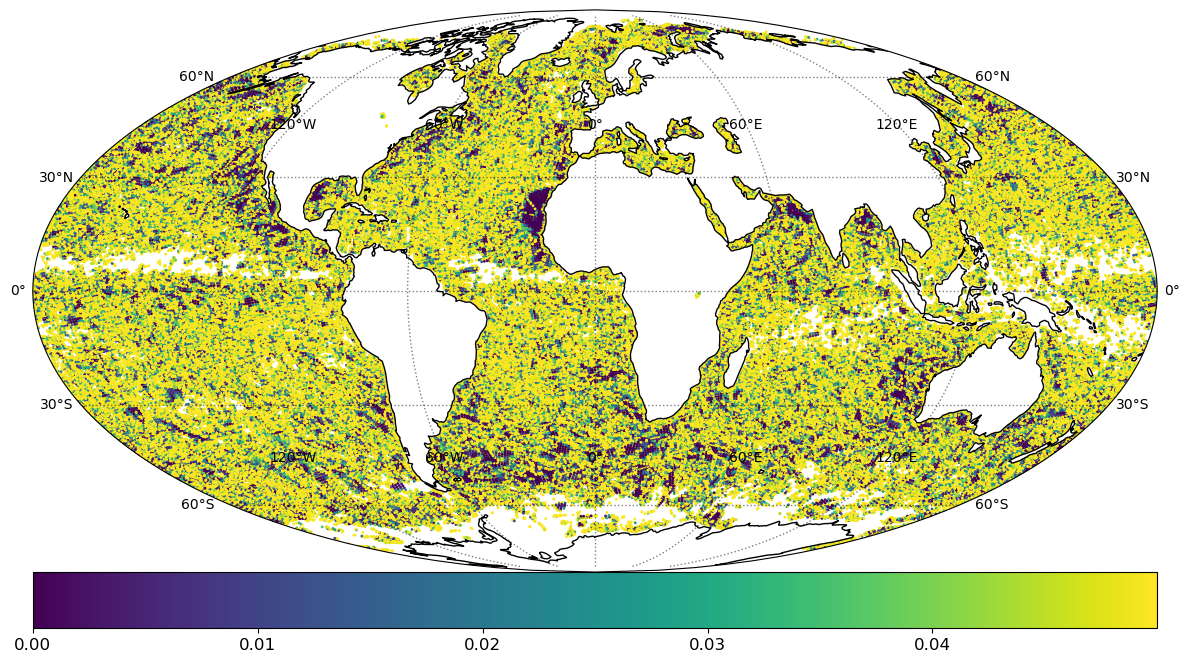

In [8]:
reload(globe)
_  = globe.plot_lons_lats_vals(viirs_tbl.lon.values, viirs_tbl.lat.values, viirs_tbl.clear_fraction.values,
                         show=True)

# Now the cutouts, each of which is 64x64 pixels covering 144x144 km^2

In [10]:
data_file = os.path.join(os.getenv('OS_SST'), 'VIIRS', 'Nenya', 
                        'PreProc', 'VIIRS_2020_95clear_192x192_preproc_viirs_std.h5')
f = h5py.File(data_file,'r')

In [11]:
f['valid'].shape

(1149968, 1, 64, 64)

In [12]:
cutout = f['valid'][100,0,...]

<Axes: >

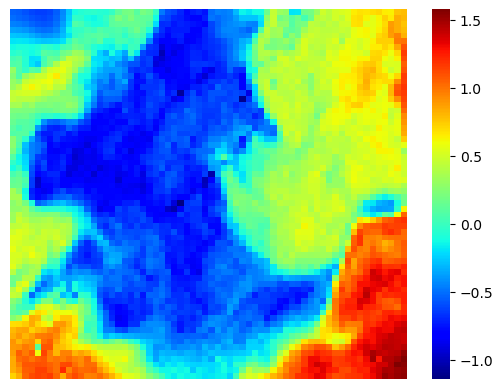

In [13]:
plot_cutout.show_image(cutout)

----

In [ ]:
data_files2, _ = podaac.grab_file_list('AMSR2-REMSS-L2P_RT-v8.2', dt_past=dict(days=1),
                                             bbox='127,18,134,23')
data_files2